In [1]:
import pandas as pd 
import numpy as np 
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import shap
from sklearn.preprocessing import OneHotEncoder

In [2]:
df = pd.read_csv(r'.\diabetes_prediction_dataset.csv')

In [3]:
df[df['diabetes']==1].shape

(8500, 9)

In [4]:
df3=df[df['diabetes']==1]
df4=df[df['diabetes']==0]
df3=pd.concat([df3,df4.sample(n=df[df['diabetes']==1].shape[0])])
df3

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
6,Female,44.0,0,0,never,19.31,6.5,200,1
26,Male,67.0,0,1,not current,27.32,6.5,200,1
38,Male,50.0,1,0,current,27.32,5.7,260,1
40,Male,73.0,0,0,former,25.91,9.0,160,1
53,Female,53.0,0,0,former,27.32,7.0,159,1
...,...,...,...,...,...,...,...,...,...
18065,Female,43.0,0,0,never,27.32,6.5,126,0
5463,Male,23.0,0,0,never,22.69,6.1,155,0
34828,Female,38.0,0,0,never,35.23,4.5,159,0
79086,Male,68.0,0,0,No Info,29.19,4.8,159,0


In [5]:
df3=df3.sample(frac=1).reset_index(drop=True)
x=df3.copy()
y=x[df3.columns[-1]]
del x[df3.columns[-1]]

In [6]:
x['smoking_history'].unique()

array(['former', 'never', 'No Info', 'not current', 'current', 'ever'],
      dtype=object)

In [7]:
s=x['gender'].unique()
t=x['smoking_history'].unique()
x.replace(s,{0,1,2},inplace=True)
x.replace(t,{0,1,2,3,4,5},inplace=True)

In [8]:
xtrain , xtest , ytrain , ytest= train_test_split(x,y,test_size=0.2)

In [9]:
xtrain.shape

(13600, 8)

In [10]:
import xgboost as xgb

In [11]:
model = xgb.XGBClassifier()

In [12]:
import pickle

In [13]:
# model = RandomForestRegressor()
model.fit(xtrain,ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [14]:
pred= model.predict(xtest)
pred= np.where(pred<0.5,0,1)

In [15]:
# Save the model to a file for future use in the Flask app
with open("xgboost_diabetes_model.pkl", "wb") as f:
    pickle.dump(model, f)

print("Model saved to xgboost_diabetes_model.pkl")

Model saved to xgboost_diabetes_model.pkl


<Axes: >

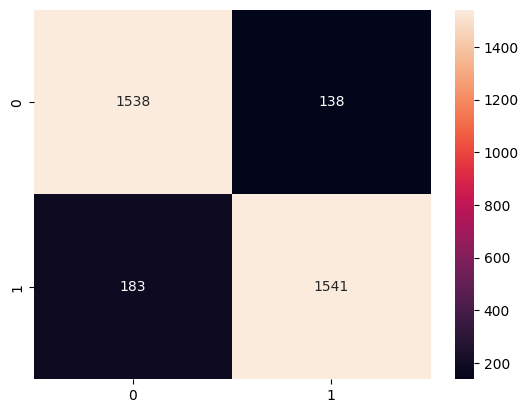

In [16]:
cf= confusion_matrix(pred,ytest)
sns.heatmap(cf,annot=True,fmt='g')


In [22]:
explainer=shap.Explainer(model.predict,xtest)
shap_values = explainer(xtest)


ExactExplainer explainer: 3401it [01:07, 44.54it/s]                          


In [ ]:
shap.force_plot(shap_values)

c:\Users\ayush\AppData\Local\Programs\Python\Python311\Lib\site-packages\shap\plots\_force.py:208: UserWarning: shap.plots.force is slow for many thousands of rows, try subsampling your data.
  warnings.warn("shap.plots.force is slow for many thousands of rows, try subsampling your data.")


In [24]:
model.predict([[0,51,1,0,0,25.19,6.6,200]])

array([1])

In [25]:
df['gender'].unique(),df['smoking_history'].unique()

(array(['Female', 'Male', 'Other'], dtype=object),
 array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
       dtype=object))

In [43]:
from sklearn import metrics
metrics.accuracy_score(ytest,pred)

0.9029411764705882